In [1]:
import numpy as np
import pandas as pd

<h1 align = 'center'>Ratio of each type/bucket in each CD</h1>

In [8]:
ratio08 = pd.read_csv('CB_bucket_prop_year_2008_nocount.csv')
ratio09 = pd.read_csv('CB_bucket_prop_year_2009_nocount.csv')
ratio10 = pd.read_csv('CB_bucket_prop_year_2010_nocount.csv')

In [9]:
ratio08.head(3)

,Unnamed: 0,CBCD,dual_elig,white,male,agecat,grand_total,count_over_CB_total,CB_total_over_grand_total,year
0,1,101,0,1,0,1,264378,0.211318,0.006283,2008
1,2,101,1,0,0,1,264378,0.198675,0.006283,2008
2,3,101,0,1,1,1,264378,0.102950,0.006283,2008


In [10]:
ratio08['type'] = ratio08.dual_elig * 8 + ratio08.white * 4 + ratio08.male * 2 + ratio08.agecat
ratio09['type'] = ratio09.dual_elig * 8 + ratio09.white * 4 + ratio09.male * 2 + ratio09.agecat
ratio10['type'] = ratio10.dual_elig * 8 + ratio10.white * 4 + ratio10.male * 2 + ratio10.agecat

In [12]:
ratio08['ratio_over_whole_NYC'] = ratio08.count_over_CB_total * ratio08.CB_total_over_grand_total
ratio09['ratio_over_whole_NYC'] = ratio09.count_over_CB_total * ratio09.CB_total_over_grand_total
ratio10['ratio_over_whole_NYC'] = ratio10.count_over_CB_total * ratio10.CB_total_over_grand_total

In [14]:
ratio_type_cd = pd.DataFrame(columns = ['CD', 'type', 'ratio_over_CD', 'ratio_over_whole_NYC'])

In [84]:
ratio_concat = pd.concat([ratio08, ratio09, ratio10], axis = 0).reset_index(drop=True)
ratio_concat.head(5)

,Unnamed: 0,CBCD,dual_elig,white,male,agecat,grand_total,count_over_CB_total,CB_total_over_grand_total,year,type,ratio_over_whole_NYC
0,1,101,0,1,0,1,264378,0.211318,0.006283,2008,5,0.001328
1,2,101,1,0,0,1,264378,0.198675,0.006283,2008,9,0.001248
2,3,101,0,1,1,1,264378,0.102950,0.006283,2008,7,0.000647
3,4,101,1,0,1,1,264378,0.083685,0.006283,2008,11,0.000526
4,5,101,0,0,0,1,264378,0.071644,0.006283,2008,1,0.000450


In [90]:
def f(x):
    d = {}
    d['ratio_over_CD'] = x['count_over_CB_total'].mean()
    d['CD_ratio_over_whole_NYC'] = x['CB_total_over_grand_total'].mean()
    return pd.Series(d, index=['ratio_over_CD', 'CD_ratio_over_whole_NYC'])

ratio = ratio_concat.groupby(['CBCD','type']).apply(f).reset_index().rename(columns = {'CBCD':'CD'})
ratio.head()

,CD,type,ratio_over_CD,CD_ratio_over_whole_NYC
0,101,0,0.025581,0.006294
1,101,1,0.072090,0.006294
2,101,2,0.018781,0.006294
3,101,3,0.036297,0.006294
4,101,4,0.045929,0.006294


In [91]:
ratio['ratio_over_whole_NYC'] = ratio.ratio_over_CD * ratio.CD_ratio_over_whole_NYC
ratio.head(5)

,CD,type,ratio_over_CD,CD_ratio_over_whole_NYC,ratio_over_whole_NYC
0,101,0,0.025581,0.006294,0.000161
1,101,1,0.072090,0.006294,0.000454
2,101,2,0.018781,0.006294,0.000118
3,101,3,0.036297,0.006294,0.000228
4,101,4,0.045929,0.006294,0.000289


In [93]:
ratio_CD_over_whole_NYC = ratio_concat.groupby(['CBCD','year'])['CB_total_over_grand_total'].mean().reset_index().groupby('CBCD')['CB_total_over_grand_total'].mean().reset_index().rename(columns = {'CBCD':'CD'})
ratio_CD_over_whole_NYC.head()

,CD,CB_total_over_grand_total
0,101,0.006294
1,102,0.011995
2,103,0.024740
3,104,0.011593
4,105,0.006842


In [98]:
def f(x):
    d = {}
    d['type_ratio_over_whole_NYC'] = x['ratio_over_whole_NYC'].sum()
    d['type_ratio_max_among_CD'] = x['ratio_over_whole_NYC'].max()
    d['type_ratio_min_among_CD'] = x['ratio_over_whole_NYC'].min()
    return pd.Series(d, index=['type_ratio_over_whole_NYC','type_ratio_max_among_CD','type_ratio_min_among_CD'])

ratio_type_over_whole_NYC = ratio.groupby(['type']).apply(f).reset_index()
ratio_type_over_whole_NYC

,type,type_ratio_over_whole_NYC,type_ratio_max_among_CD,type_ratio_min_among_CD
0,0,0.037997,0.002413,0.000122
1,1,0.047187,0.003704,0.000138
2,2,0.024489,0.001760,0.000087
3,3,0.024885,0.001607,0.000070
4,4,0.069439,0.005825,0.000004
5,5,0.194109,0.014438,0.000005
6,6,0.058197,0.004586,0.000004
7,7,0.118639,0.010142,0.000004
8,8,0.056822,0.003355,0.000139
9,9,0.121113,0.007400,0.000264


In [119]:
ratio_CD_within_each_type = ratio.groupby(['type', 'CD']).agg({'ratio_over_whole_NYC': 'sum'}).groupby(level=0).apply(lambda x: x / float(x.sum())).rename(columns = {'ratio_over_whole_NYC':'ratio_CD_within_type'}).reset_index()
ratio_CD_within_each_type.head()

,type,CD,ratio_CD_within_type
0,0,101,0.004238
1,0,102,0.003787
2,0,103,0.017274
3,0,104,0.009110
4,0,105,0.003552


In [120]:
ratio.to_csv('ratio.csv', index = False)
ratio_CD_over_whole_NYC.to_csv('ratio_CD_over_whole_NYC.csv', index = False)
ratio_type_over_whole_NYC.to_csv('ratio_type_over_whole_NYC.csv', index = False)
ratio_CD_within_each_type.to_csv('ratio_CD_within_each_type.csv', index = False)

<h1 align = "center"> Generate initial weights table </h1>

In [4]:
weights = pd.DataFrame(columns = ['agent-type', 'dual-eligible', 'race', 'gender', 'age', 'choice-type', "attribute", "social_norm","efficacy"])

In [5]:
def decode_type(agent_type):
    return (agent_type & 8) >> 3, (agent_type & 4) >> 2, (agent_type & 2) >> 1, agent_type & 1

for i in range(16):
    dual_eligible, race, gender, age = decode_type(i)
    for j in ['ER', 'Office']:
        weights = weights.append({'agent-type':i,'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age, 'choice-type':j,"attribute":1,"social_norm":1,"efficacy":1}, ignore_index = True)

In [6]:
weights.to_csv('weights.csv',index = False)

<h1 align = "center"> Generate initial weights table 2</h1>

In [8]:
weights = pd.DataFrame(columns = ['agent-type', 'dual-eligible', 'race', 'gender', 'age', 'choice-type', "attribute", "social_norm","efficacy", "floating-prob", "floating-mu", "floating-sigma"])

def decode_type(agent_type):
    return (agent_type & 8) >> 3, (agent_type & 4) >> 2, (agent_type & 2) >> 1, agent_type & 1

for i in range(16):
    dual_eligible, race, gender, age = decode_type(i)
    for j in ['ER', 'Office']:
        weights = weights.append({'agent-type':i,'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age, 'choice-type':j,"attribute":1,"social_norm":1,"efficacy":1,"floating-prob":0.2, "floating-mu":1, "floating-sigma":1}, ignore_index = True)

weights.to_csv('weights_f.csv',index = False)

<h1 align = "center"> Generate Gamma Distribution Matrix for LOS </h1>

In [2]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [3]:
gamma_los = pd.read_csv("hospitalization_los_distribution_params_all_bucket_whole_city.csv")
gamma_los = gamma_los.drop(gamma_los.columns[0],axis = 1)

In [4]:
gamma_los[['bucket','n_mixture']]

,bucket,n_mixture
0,0,4
1,1,8
2,10,2
3,11,6
4,100,7
5,101,8
6,110,2
7,111,3
8,1000,6
9,1001,8


In [5]:
def f(row):
    agent_type = int(str(int(row['bucket'])),2)
    age = (agent_type & 0b1000) >> 3
    gender = (agent_type & 0b100) >> 2
    race = (agent_type & 0b10) >> 1
    dual_eligible = (agent_type & 0b1) >> 0
    agent_type = int(dual_eligible * 8 + race * 4 + gender * 2 + age)
    return pd.Series({'type':agent_type, 'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age}, dtype = np.int32)
    
gamma_los[['type','dual-eligible','race','gender','age']] = gamma_los.apply(f, axis = 1)
gamma_los.head()

,bucket,n_mixture,lambda_1,alpha_1,beta_1,lambda_2,alpha_2,beta_2,lambda_3,alpha_3,...,alpha_8,beta_8,lambda_9,alpha_9,beta_9,type,dual-eligible,race,gender,age
0,0,4,0.399180,6.512051,0.216114,0.369348,11.507293,0.391921,0.118926,27.288766,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,1,8,0.222673,16.117042,0.066902,0.195480,24.221707,0.097224,0.169722,36.964258,...,1.402935,63.877074,NaN,NaN,NaN,8,1,0,0,0
2,10,2,0.268304,8.064436,0.160551,0.731696,0.839592,10.355997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,0,1,0,0
3,11,6,0.240983,49.798034,0.020511,0.124704,24.807690,0.093375,0.077833,88.121480,...,NaN,NaN,NaN,NaN,NaN,12,1,1,0,0
4,100,7,0.286704,53.012782,0.019241,0.217655,24.088971,0.100857,0.077138,91.585133,...,NaN,NaN,NaN,NaN,NaN,2,0,0,1,0


In [8]:
class los:
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.los = pd.DataFrame(columns = ['type','day','ratio'])
        
    def get_discrete_gamma(self, shape, scale, epsilon):
        last_cdf = 0
        new_cdf = 0
        i = 0
        result = {}
        while new_cdf < 1 - epsilon:
            new_cdf = gamma.cdf(i + 0.5, a = shape, scale = scale)
            result[i] = new_cdf - last_cdf
            last_cdf = new_cdf
            i += 1
        return result
    
    def process_row(self, row):
        n_mixture = row['n_mixture']
        for i in np.arange(1, n_mixture + 1, dtype = np.int32):
            this_gamma_ratio = row['lambda_' + repr(i)]
            this_gamma_result = self.get_discrete_gamma(shape = row['alpha_' + repr(i)], scale = row['beta_' + repr(i)], epsilon = 0.001)
            for key, value in this_gamma_result.items():
                self.los = self.los.append({'type':row['type'], 'day':key, 'ratio':value * this_gamma_ratio}, ignore_index = True)
        
    def generate_los(self, threshold = 0.003):
        self.los = pd.DataFrame(columns = ['type','day','ratio'])
        self.raw_df.apply(lambda row: self.process_row(row), axis = 1)
        self.los = self.los.groupby(['type', 'day']).sum().query('ratio > '+ repr(threshold)).groupby(level=0).apply(lambda x: x / float(x.sum())).sort_values(by = ['type', 'ratio'], ascending = [True, False]).reset_index()
        self.los['order'] = self.los.groupby('type').cumcount()
        self.los['type'] = self.los['type'].astype(int)
        self.los['day'] = self.los['day'].astype(int)
        
    def parse_row(self, row):
            return [[row['day'], row['ratio']], ['day' + repr(int(row['order'])), 'ratio' + repr(int(row['order']))]]
    
    def generate_los_concentrated(self):
        self.los_conc = pd.DataFrame()
        for the_type in self.los['type'].unique():
            parsed_rows = self.los[self.los['type'] == the_type].apply(self.parse_row, axis = 1)
            this_row = pd.DataFrame({'type':[the_type], 'ndays': len(parsed_rows)})
            for row_list in parsed_rows:
                this_row = pd.concat([this_row,pd.DataFrame(data = [row_list[0]], columns = row_list[1])], axis = 1, sort = False)
            self.los_conc = self.los_conc.append(this_row, sort = False)
        self.los_conc['type'] = self.los_conc['type'].astype(int)

In [9]:
x = los(gamma_los)
x.generate_los(0.003)
x.generate_los_concentrated()

In [10]:
x.los.head(20)

,type,day,ratio,order
0,0,1,0.258917,0
1,0,2,0.166361,1
2,0,4,0.123591,2
3,0,5,0.102326,3
4,0,3,0.095431,4
5,0,6,0.058315,5
6,0,7,0.030469,6
7,0,10,0.029023,7
8,0,9,0.026692,8
9,0,11,0.026211,9


In [11]:
x.los_conc

,type,ndays,day0,ratio0,day1,ratio1,day2,ratio2,day3,ratio3,...,day29,ratio29,day30,ratio30,day31,ratio31,day32,ratio32,day33,ratio33
0,0,17,1.0,0.258917,2.0,0.166361,4.0,0.123591,5.0,0.102326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,22,1.0,0.224659,4.0,0.124631,2.0,0.122569,3.0,0.113942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,28,1.0,0.305487,2.0,0.132689,3.0,0.112629,4.0,0.085395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,29,1.0,0.227690,2.0,0.150574,3.0,0.121654,4.0,0.088823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,30,1.0,0.278573,2.0,0.147229,0.0,0.065277,3.0,0.063083,...,29.0,0.003348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,26,2.0,0.163954,1.0,0.141119,3.0,0.139853,4.0,0.107516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,29,1.0,0.322455,2.0,0.147067,0.0,0.067720,3.0,0.058553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,7,19,1.0,0.273507,3.0,0.133333,2.0,0.111075,4.0,0.093302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,8,27,1.0,0.217397,2.0,0.142578,3.0,0.127509,5.0,0.098118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9,28,1.0,0.176839,3.0,0.140079,2.0,0.120531,4.0,0.109557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
x.los_conc.to_csv('los.csv', index = False)

<h1 align = "center"> Probability of Hospitalization after decision </h1>

In [17]:
prob = pd.read_csv("hosp_prop_after_decision_all_bucket_whole_city.csv")
prob = prob.drop(prob.columns[0],axis = 1)
prob.head()

,ER_hosp_prob,ER_hosp_ACSC_prob,EM_hosp_prob,EM_hosp_ACSC_prob,bucket
0,0.004488,0.411765,0.001437,0.180587,0
1,0.005781,0.181818,0.001955,0.262000,1
2,0.007937,0.229730,0.001467,0.220662,10
3,0.010690,0.187500,0.001404,0.229577,11
4,0.006157,0.192308,0.002036,0.170732,100


In [18]:
def f(row):
    agent_type = int(str(int(row['bucket'])),2)
    age = (agent_type & 0b1000) >> 3
    gender = (agent_type & 0b100) >> 2
    race = (agent_type & 0b10) >> 1
    dual_eligible = (agent_type & 0b1) >> 0
    agent_type = int(dual_eligible * 8 + race * 4 + gender * 2 + age)
    return pd.Series({'type':agent_type, 'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age}, dtype = np.int32)
    
prob[['type','dual-eligible','race','gender','age']] = prob.apply(f, axis = 1)
prob.head()

,ER_hosp_prob,ER_hosp_ACSC_prob,EM_hosp_prob,EM_hosp_ACSC_prob,bucket,type,dual-eligible,race,gender,age
0,0.004488,0.411765,0.001437,0.180587,0,0,0,0,0,0
1,0.005781,0.181818,0.001955,0.262000,1,8,1,0,0,0
2,0.007937,0.229730,0.001467,0.220662,10,4,0,1,0,0
3,0.010690,0.187500,0.001404,0.229577,11,12,1,1,0,0
4,0.006157,0.192308,0.002036,0.170732,100,2,0,0,1,0


In [19]:
prob_to_save = prob[['type','ER_hosp_prob','EM_hosp_prob']]
prob_to_save

In [21]:
prob_to_save.to_csv('hosp_prob_after_decision.csv', index = False)

<h1 align = "center"> Generate Gamma Distribution Matrix for Decisions Interval </h1>

In [2]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [3]:
gamma_interval = pd.read_csv("decision_interval_distribution_all_bucket_whole_city.csv")
gamma_interval = gamma_interval.drop(gamma_interval.columns[0],axis = 1)

In [4]:
gamma_interval[['bucket','n_mixture']]

,bucket,n_mixture
0,0,20
1,1,10
2,10,20
3,11,15
4,100,20
5,101,20
6,110,15
7,111,10
8,1000,20
9,1001,20


In [60]:
candidate = []
for item in gamma_interval.columns:
    if item.find('lambda') >= 0:
        candidate.append(item)

In [67]:
check = gamma_interval[candidate]
def f(row):
    print(-np.sort(-row)) 
    
check.apply(f, axis = 1)

[0.11070208 0.10766864 0.08884082 0.08177874 0.08059882 0.04899239
 0.04864875 0.04830375 0.04764823 0.04515835 0.04360373 0.04049964
 0.03685556 0.03283855 0.03086127 0.03033215 0.02583208 0.0230914
 0.02216092 0.00558413]
[0.21102703 0.2077985  0.16750152 0.12301886 0.09855772 0.09169413
 0.05786538 0.02933759 0.01203111 0.00116816        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
[0.08635158 0.08362796 0.08261769 0.08222786 0.07943814 0.05876294
 0.05650643 0.05131059 0.04976425 0.04950047 0.04948391 0.04846286
 0.04600598 0.03699425 0.03494022 0.03444057 0.03439111 0.01972317
 0.00894078 0.00650922]
[0.10986675 0.09727014 0.09328266 0.09308105 0.08188587 0.08116734
 0.07701546 0.06746658 0.06043418 0.05980649 0.05634953 0.04156208
 0.04049701 0.03279638 0.00751848        nan        nan        nan
        nan        nan]
[0.09904726 0.09344887 0.08625709 0.07336588 0.07095933 0.06771542
 0.06327615 0.0622036  0.06182761 

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
dtype: object

In [5]:
def f(row):
    agent_type = int(str(int(row['bucket'])),2)
    age = (agent_type & 0b1000) >> 3
    gender = (agent_type & 0b100) >> 2
    race = (agent_type & 0b10) >> 1
    dual_eligible = (agent_type & 0b1) >> 0
    agent_type = int(dual_eligible * 8 + race * 4 + gender * 2 + age)
    return pd.Series({'type':agent_type, 'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age}, dtype = np.int32)
    
gamma_interval[['type','dual-eligible','race','gender','age']] = gamma_interval.apply(f, axis = 1)
gamma_interval

,V1,bucket,n_mixture,mean,lambda_1,alpha_1,beta_1,lambda_2,alpha_2,beta_2,...,alpha_19,beta_19,lambda_20,alpha_20,beta_20,type,dual-eligible,race,gender,age
0,1,0,20,33.58134,0.048304,14.342291,12657.803910,0.030332,52.275669,5449.660146,...,42.958364,180998.751000,0.045158,6.954313,2.289547e+06,0,0,0,0,0
1,1,1,10,28.51358,0.098558,11.455616,18615.182100,0.207799,23.369584,22526.482250,...,NaN,NaN,NaN,NaN,NaN,8,1,0,0,0
2,1,10,20,30.07301,0.056506,14.760094,3.503128,0.086352,28.684200,3.447901,...,2296.829609,0.909473,0.082618,5.809349,5.588993e+02,4,0,1,0,0
3,1,11,15,18.16105,0.007518,8.875816,14478.099220,0.109867,24.065679,8544.198330,...,NaN,NaN,NaN,NaN,NaN,12,1,1,0,0
4,1,100,20,34.90986,0.063276,13.538741,14547.746050,0.050867,39.941995,8827.644298,...,142.946302,55839.615410,0.067715,5.165501,2.941542e+06,2,0,0,1,0
5,1,101,20,28.68591,0.085091,13.950104,14224.614610,0.085137,42.585770,8722.620999,...,52.569842,102966.194500,0.092376,3.736712,3.145806e+06,10,1,0,1,0
6,1,110,15,30.56891,0.116414,9.365404,26935.614620,0.068222,125.251457,3831.764320,...,NaN,NaN,NaN,NaN,NaN,6,0,1,1,0
7,1,111,10,19.00313,0.026513,25.990149,6132.633602,0.054409,31.340042,6035.344797,...,NaN,NaN,NaN,NaN,NaN,14,1,1,1,0
8,1,1000,20,33.28563,0.066037,13.782942,14833.523990,0.026697,450048.704600,0.767750,...,29.622698,432434.667300,0.008202,14.902548,1.720586e+06,1,0,0,0,1
9,1,1001,20,29.62876,0.042157,29.358187,5482.482480,0.089466,20.471397,15886.376220,...,63.167062,89211.636720,0.088640,3.862828,3.024722e+06,9,1,0,0,1


In [75]:
class interval:
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.interval = pd.DataFrame(columns = ['type','day','ratio'])
        
    def rescale(self, row):
        expected_mean = row['mean']
        n_mixture = row['n_mixture']
        real_mean = 0
        scale_pool = []
        triples_col = []
        for i in np.arange(1, n_mixture + 1, dtype = np.int32):
            scale_pool.append('beta_' + repr(i))
            triples_col.append(['lambda_' + repr(i), 'alpha_' + repr(i), 'beta_' + repr(i)])
        for triple_col in triples_col:
            triple = tuple(row[triple_col])
            real_mean += triple[0] * gamma.mean(a = triple[1], scale = triple[2])
        amp = float (real_mean / expected_mean)
        row[scale_pool] = row[scale_pool] / amp
        return row
    
    def do_rescale(self):
        self.raw_df = self.raw_df.apply(self.rescale, axis = 1)
        
    def get_discrete_gamma(self, shape, scale, epsilon):
        range_start = np.floor(gamma.ppf(epsilon / 2, a = shape, scale = scale))
        range_end = np.ceil(gamma.ppf(1 - epsilon / 2, a = shape, scale = scale))
        last_cdf = gamma.cdf(range_start - 0.5, a = shape, scale = scale)
        result = {}
        for i in np.arange(range_start, range_end + 1):
            if i > 730:
                break
            new_cdf = gamma.cdf(i + 0.5, a = shape, scale = scale)
            result[i] = new_cdf - last_cdf
            last_cdf = new_cdf
            i += 1
        return result
    
    def process_row(self, row):
        n_mixture = row['n_mixture']
        for i in np.arange(1, n_mixture + 1, dtype = np.int32):
            this_gamma_ratio = row['lambda_' + repr(i)]
            this_gamma_result = self.get_discrete_gamma(shape = row['alpha_' + repr(i)], scale = row['beta_' + repr(i)], epsilon = 0.001)
            for key, value in this_gamma_result.items():
                self.interval = self.interval.append({'type':row['type'], 'day':key, 'ratio':value * this_gamma_ratio}, ignore_index = True)
        
    def generate_interval(self, threshold = 0.003):
        self.interval = pd.DataFrame(columns = ['type','day','ratio'])
        self.raw_df.apply(lambda row: self.process_row(row), axis = 1)
        self.interval = self.interval.groupby(['type', 'day']).sum().query('ratio > '+ repr(threshold)).groupby(level=0).apply(lambda x: x / float(x.sum())).sort_values(by = ['type', 'ratio'], ascending = [True, False]).reset_index()
        self.interval['order'] = self.interval.groupby('type').cumcount()
        self.interval['type'] = self.interval['type'].astype(int)
        self.interval['day'] = self.interval['day'].astype(int)
        
    def parse_row(self, row):
            return [[row['day'], row['ratio']], ['day' + repr(int(row['order'])), 'ratio' + repr(int(row['order']))]]
    
    def generate_interval_concentrated(self):
        self.interval_conc = pd.DataFrame()
        for the_type in self.interval['type'].unique():
            parsed_rows = self.interval[self.interval['type'] == the_type].apply(self.parse_row, axis = 1)
            this_row = pd.DataFrame({'type':[the_type], 'ndays': len(parsed_rows)})
            for row_list in parsed_rows:
                this_row = pd.concat([this_row,pd.DataFrame(data = [row_list[0]], columns = row_list[1])], axis = 1, sort = False)
            self.interval_conc = self.interval_conc.append(this_row, sort = False)
        self.interval_conc['type'] = self.interval_conc['type'].astype(int)

In [76]:
x = interval(gamma_interval)
x.do_rescale()

x.generate_interval(0.003)
x.generate_interval_concentrated()

In [77]:
x.interval_conc

,type,ndays,day0,ratio0,day1,ratio1,day2,ratio2,day3,ratio3,...,day59,ratio59,day60,ratio60,day61,ratio61,day62,ratio62,day63,ratio63
0,0,63,7.0,0.074202,14.0,0.059360,6.0,0.041705,4.0,0.040394,...,45.0,0.004294,44.0,0.004205,62.0,0.003899,63.0,0.003480,NaN,NaN
0,1,63,7.0,0.060854,6.0,0.055892,14.0,0.054815,2.0,0.042143,...,39.0,0.004321,54.0,0.003798,66.0,0.003788,50.0,0.003772,NaN,NaN
0,2,63,7.0,0.062080,6.0,0.052238,14.0,0.046609,8.0,0.045498,...,68.0,0.003564,89.0,0.003520,88.0,0.003517,72.0,0.003499,NaN,NaN
0,3,58,7.0,0.068311,6.0,0.051436,14.0,0.050110,3.0,0.043464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,61,7.0,0.072639,6.0,0.056382,4.0,0.049599,2.0,0.043503,...,64.0,0.003422,71.0,0.003410,NaN,NaN,NaN,NaN,NaN,NaN
0,5,62,7.0,0.074460,6.0,0.049601,4.0,0.048000,2.0,0.047640,...,64.0,0.003630,55.0,0.003482,52.0,0.003465,NaN,NaN,NaN,NaN
0,6,62,7.0,0.092477,3.0,0.051248,5.0,0.049845,13.0,0.046207,...,70.0,0.003620,54.0,0.003474,63.0,0.003463,NaN,NaN,NaN,NaN
0,7,56,7.0,0.085296,14.0,0.061363,5.0,0.049378,6.0,0.044991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,8,64,6.0,0.073330,5.0,0.063556,2.0,0.056028,7.0,0.049168,...,70.0,0.003610,71.0,0.003529,52.0,0.003512,72.0,0.003444,51.0,0.003402
0,9,63,7.0,0.063875,6.0,0.056515,13.0,0.050674,2.0,0.043379,...,67.0,0.003699,49.0,0.003518,55.0,0.003466,68.0,0.003419,NaN,NaN


In [78]:
x.interval_conc.to_csv('decision_intervals.csv', index = False)

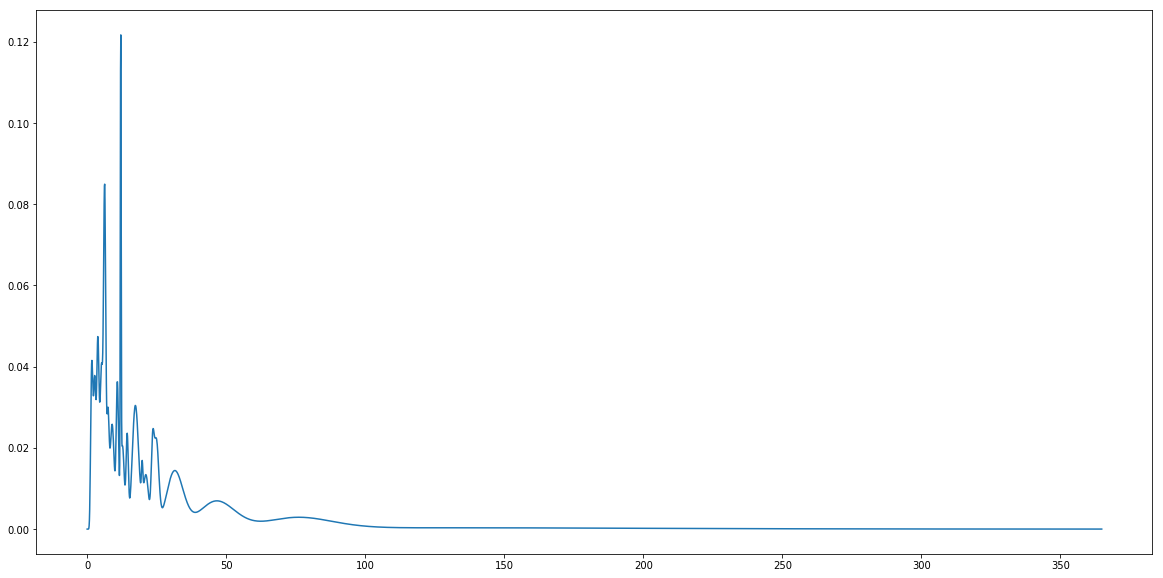

In [26]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, 365, 0.1), y)

<h1 align = "center"> Reprocess Cost data</h1>

In [2]:
cost = pd.read_csv("cost_gamma_distribution_parameter_by_type.csv")
cost = cost.drop(cost.columns[0],axis = 1)
cost.rename(columns = {"type": "ER/Office/Hospital"},inplace = True)
cost.head()

,scale,shape,ER/Office/Hospital,bucket
0,357.882749,0.814071,1,0
1,267.194874,1.089533,1,1
2,278.357135,1.229287,1,10
3,228.872452,1.447075,1,11
4,371.990028,0.762484,1,100


In [4]:
def f(row):
    agent_type = int(str(int(row['bucket'])),2)
    age = (agent_type & 0b1000) >> 3
    gender = (agent_type & 0b100) >> 2
    race = (agent_type & 0b10) >> 1
    dual_eligible = (agent_type & 0b1) >> 0
    agent_type = int(dual_eligible * 8 + race * 4 + gender * 2 + age)
    return pd.Series({'type':agent_type, 'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age}, dtype = np.int32)
    
cost[['type','dual-eligible','race','gender','age']] = cost.apply(f, axis = 1)
cost.sort_values(by = ['ER/Office/Hospital', 'type'], inplace = True)
cost.head()

,scale,shape,ER/Office/Hospital,bucket,type,dual-eligible,race,gender,age
0,357.882749,0.814071,1,0,0,0,0,0,0
8,238.821757,1.327356,1,1000,1,0,0,0,1
4,371.990028,0.762484,1,100,2,0,0,1,0
12,290.910222,1.074058,1,1100,3,0,0,1,1
2,278.357135,1.229287,1,10,4,0,1,0,0


In [5]:
cost.to_csv("costs.csv", index = False)

In [62]:
class test:
    def __init__(self):
        self.x =x = pd.DataFrame({'a':[1,2],'b':[3,4], 'c':[1,2]})
    
    def ff(self,row):
        row['c'] = 10000
        print(row)
        return row
    
    def f(self):
        self.x.apply(self.ff, axis = 1)

<h1 align = 'center'> Process Choice Type Ratio from CMS </h1>

In [9]:
r = pd.read_csv("pat_type_notol_prop.csv")
r.drop(r.columns[0],axis = 1, inplace = True)
r_tol = pd.read_csv("pat_type_tol_prop.csv")
r_tol.drop(r_tol.columns[0],axis = 1, inplace = True)

In [10]:
r.head()

,patient_type_notol,notol_count,bucket,notol_bucket_count,notol_bucket_prop
0,EM,176580,0.0,7431.5,0.042086
1,EM,176580,1.0,9192.5,0.052059
2,EM,176580,10.0,15187.0,0.086006
3,EM,176580,11.0,6346.0,0.035938
4,EM,176580,100.0,4897.5,0.027735


In [11]:
r_tol.head()

,patient_type_tol,tol_count,bucket,tol_bucket_count,tol_bucket_prop
0,EM,229036,0.0,9429.5,0.041170
1,EM,229036,1.0,12641.0,0.055192
2,EM,229036,10.0,18604.5,0.081230
3,EM,229036,11.0,8100.0,0.035366
4,EM,229036,100.0,5985.0,0.026131


In [34]:
def f(row):
    if not np.isnan(row['bucket']):
        agent_type = int(str(int(row['bucket'])),2)
        age = (agent_type & 0b1000) >> 3
        gender = (agent_type & 0b100) >> 2
        race = (agent_type & 0b10) >> 1
        dual_eligible = (agent_type & 0b1) >> 0
        agent_type = int(dual_eligible * 8 + race * 4 + gender * 2 + age)
        return pd.Series({'type':agent_type, 'dual-eligible':dual_eligible, 'race': race, 'gender': gender, 'age': age}, dtype = np.int32)
    
r[['type','dual-eligible','race','gender','age']] = r.apply(f, axis = 1)
r.sort_values(by = ['patient_type_notol', 'type'], inplace = True)
r_tol[['type','dual-eligible','race','gender','age']] = r.apply(f, axis = 1)
r_tol.sort_values(by = ['patient_type_tol', 'type'], inplace = True)

In [35]:
r.head()

,patient_type_notol,notol_count,bucket,notol_bucket_count,notol_bucket_prop,type,dual-eligible,race,gender,age
0,EM,176580,0.0,7431.5,0.042086,0.0,0.0,0.0,0.0,0.0
8,EM,176580,1000.0,8172.0,0.046279,1.0,0.0,0.0,0.0,1.0
4,EM,176580,100.0,4897.5,0.027735,2.0,0.0,0.0,1.0,0.0
12,EM,176580,1100.0,4277.5,0.024224,3.0,0.0,0.0,1.0,1.0
2,EM,176580,10.0,15187.0,0.086006,4.0,0.0,1.0,0.0,0.0


In [36]:
r_tol.head()

,patient_type_tol,tol_count,bucket,tol_bucket_count,tol_bucket_prop,type,dual-eligible,race,gender,age
0,EM,229036,0.0,9429.5,0.041170,0.0,0.0,0.0,0.0,0.0
8,EM,229036,1000.0,10546.5,0.046047,1.0,0.0,0.0,0.0,1.0
4,EM,229036,100.0,5985.0,0.026131,2.0,0.0,0.0,1.0,0.0
12,EM,229036,1100.0,5485.0,0.023948,3.0,0.0,0.0,1.0,1.0
2,EM,229036,10.0,18604.5,0.081230,4.0,0.0,1.0,0.0,0.0


In [37]:
r.to_csv("decision_types.csv",index = False)
r_tol.to_csv("decision_types_tol.csv", index = False)